In [43]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install tabulate

In [44]:
# import python libraries
import numpy as np # mathematical use
import pandas as pd # dataframe
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import os

In [45]:
current_dir = os.getcwd()
file_path = current_dir + "/Dataset  .xlsx"
print(file_path)

C:\Users\Shivangi\Downloads\Assigment weekly/Dataset  .xlsx


In [46]:
df=pd.read_excel(file_path, skiprows=1, header=0) #import Excel file


**DATA CLEANING**

In [47]:
df.shape # no. of row and column

(5794, 29)

In [48]:
df.head()

,Campaign name,Ad set name,Ad name,Reach,Impressions,Clicks,Landing page views,Purchases,Adds to cart,Conversions,...,"CPM (cost per 1,000 impressions)",App Installs,Adds to cart.1,Purchases.1,Purchases Conversion Value,Day,Month,Audience,Ad type,Product
0,Campaign 1,Ad set1,AD1,17,18,1,0,0,0,0,...,46.11,0,0,0,0.00,2024-01-01,2024-01-01,Retargeting,Custom,shirts
1,Campaign 1,Ad set1,AD2,7,8,0,0,0,0,0,...,0.00,0,0,0,0.00,2024-01-01,2024-01-01,Retargeting,Catalog,T-Shirts
2,Campaign 1,Ad set1,AD3,95,97,0,0,0,0,0,...,2.37,0,0,0,0.00,2024-01-01,2024-01-01,Retargeting,Catalog,Jeans
3,Campaign 1,Ad set1,AD4,65828,73875,1746,1404,21,229,92,...,37.16,0,229,21,20891.95,2024-01-01,2024-01-01,Retargeting,Catalog,All
4,Campaign 1,Ad set1,AD5,61700,74312,1438,1082,5,140,46,...,29.96,0,140,5,3395.00,2024-01-01,2024-01-01,Retargeting,Catalog,All


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5794 entries, 0 to 5793
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Campaign name                       5794 non-null   object        
 1   Ad set name                         5794 non-null   object        
 2   Ad name                             5794 non-null   object        
 3   Reach                               5794 non-null   int64         
 4   Impressions                         5794 non-null   int64         
 5   Clicks                              5794 non-null   int64         
 6   Landing page views                  5794 non-null   int64         
 7   Purchases                           5794 non-null   int64         
 8   Adds to cart                        5794 non-null   int64         
 9   Conversions                         5794 non-null   int64         
 10  Website purchases conver

In [50]:
#  Check data types
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
Campaign name                                 object
Ad set name                                   object
Ad name                                       object
Reach                                          int64
Impressions                                    int64
Clicks                                         int64
Landing page views                             int64
Purchases                                      int64
Adds to cart                                   int64
Conversions                                    int64
Website purchases conversion value            object
Amount spent (INR)                            object
CTR                                          float64
CPS                                          float64
A2C                                          float64
C2C                                          float64
ROAS                                         float64
Conversion                                   float64
AOV                               

In [51]:
df['Website purchases conversion value'] = df['Website purchases conversion value'].replace('[₹,]', '', regex=True).astype(float)
df['Amount spent (INR)'] = df['Amount spent (INR)'].replace('[₹,]', '', regex=True).astype(float)

In [52]:
# Check for duplicate values
duplicates = df.duplicated()
print("duplicates Values in a Table:")
print(duplicates)

duplicates Values in a Table:
0       False
1       False
2       False
3       False
4       False
        ...  
5789    False
5790    False
5791    False
5792    False
5793    False
Length: 5794, dtype: bool


In [53]:
# Save the cleaned dataset to a new file or overwrite the existing one
df.to_excel('cleaned_dataset.xlsx', index=False)

**Data Analysis and Visualization**

In [54]:
df.describe()

,Reach,Impressions,Clicks,Landing page views,Purchases,Adds to cart,Conversions,Website purchases conversion value,Amount spent (INR),CTR,...,ROAS,Conversion,AOV,"CPM (cost per 1,000 impressions)",App Installs,Adds to cart.1,Purchases.1,Purchases Conversion Value,Day,Month
count,5.794000e+03,5.794000e+03,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,...,5794.000000,5794.000000,5794.000000,5794.000000,5794.0,5794.000000,5794.000000,5794.000000,5794,5794
mean,3.743031e+04,4.482271e+04,790.365205,616.189161,8.910770,102.031067,36.935968,8627.613069,1902.930630,0.014013,...,23.168065,0.037262,489.734522,46.681353,0.0,102.031067,8.910770,8627.613069,2024-02-17 20:00:09.941318656,2024-02-03 15:56:21.290990336
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2024-01-01 00:00:00,2024-01-01 00:00:00
25%,3.000000e+01,3.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.280000,0.000000,...,0.000000,0.000000,0.000000,21.560000,0.0,0.000000,0.000000,0.000000,2024-01-31 00:00:00,2024-01-01 00:00:00
50%,9.990000e+02,1.151500e+03,13.000000,9.000000,0.000000,5.000000,2.000000,0.000000,58.705000,0.012300,...,0.000000,0.000000,0.000000,43.040000,0.0,5.000000,0.000000,0.000000,2024-02-17 00:00:00,2024-02-01 00:00:00
75%,1.313850e+04,1.532800e+04,259.750000,205.000000,3.000000,38.000000,14.000000,3382.750000,813.857500,0.020400,...,3.830000,0.014700,924.000000,63.305000,0.0,38.000000,3.000000,3382.750000,2024-03-09 00:00:00,2024-03-01 00:00:00
max,1.653702e+06,1.818123e+06,26141.000000,19685.000000,318.000000,2899.000000,1114.000000,361738.100000,46266.660000,0.333300,...,77400.000000,5.000000,10876.000000,2765.000000,0.0,2899.000000,318.000000,361738.100000,2024-03-31 00:00:00,2024-03-01 00:00:00
std,1.146885e+05,1.379216e+05,2426.234273,1888.582360,27.226857,300.549619,109.650929,26017.316474,5455.362277,0.017388,...,1064.224448,0.245491,621.615146,54.554696,0.0,300.549619,27.226857,26017.316474,NaN,NaN


Weekly Summary:
                index             0
0               Reach  1.338973e+07
1         Impressions  1.647838e+07
2              Clicks  3.001330e+05
3           Purchases  4.999000e+03
4  Amount spent (INR)  7.756070e+05
5                ROAS  5.481059e+00


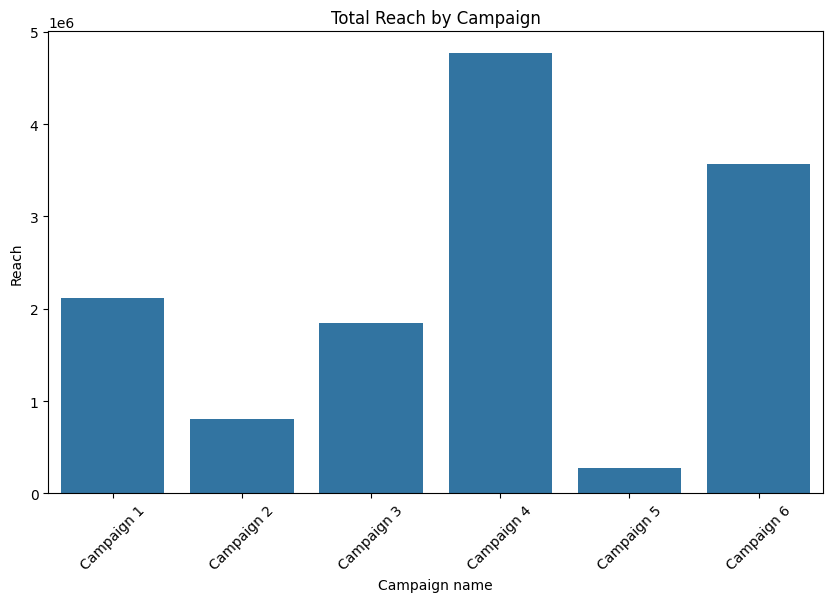

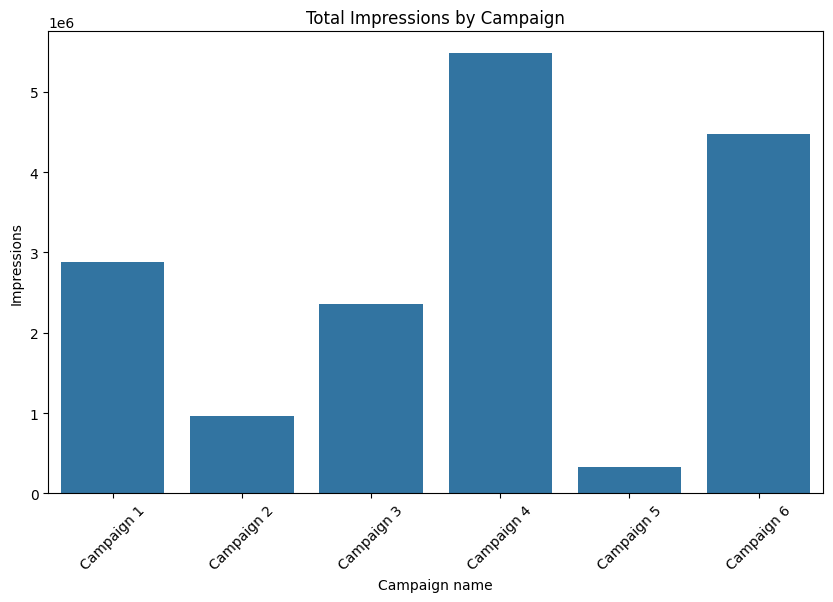

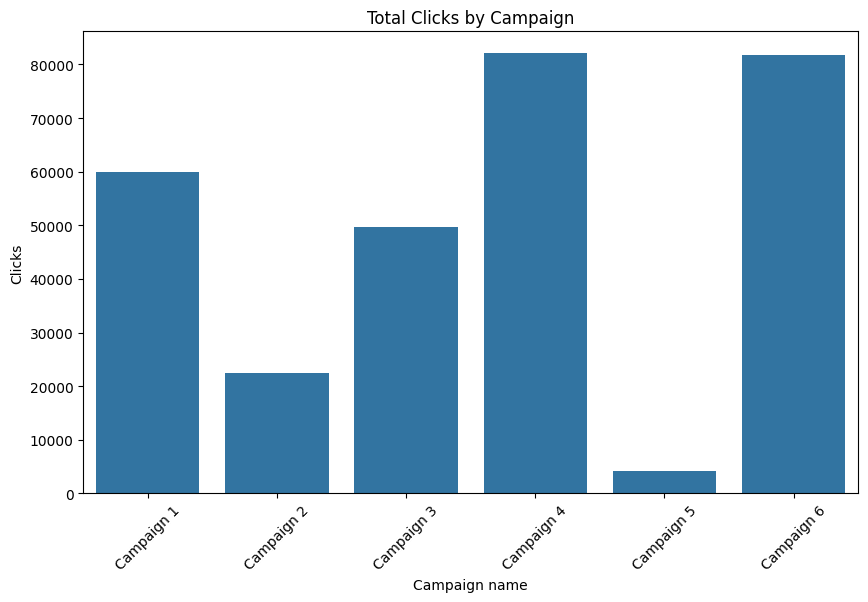

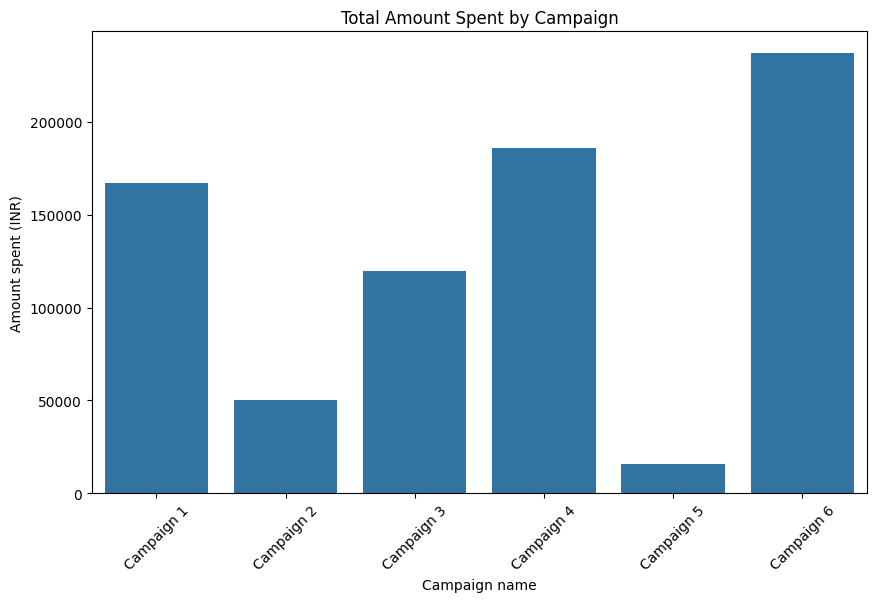

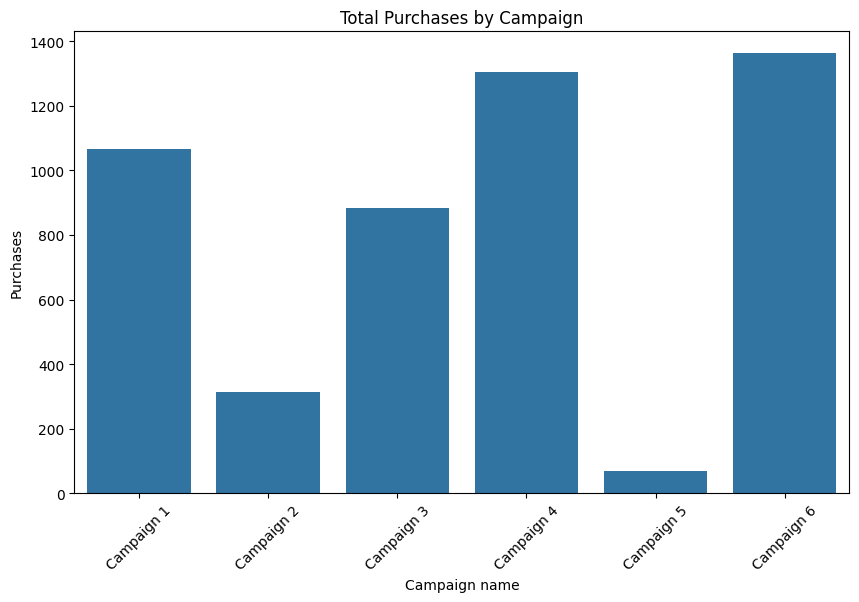

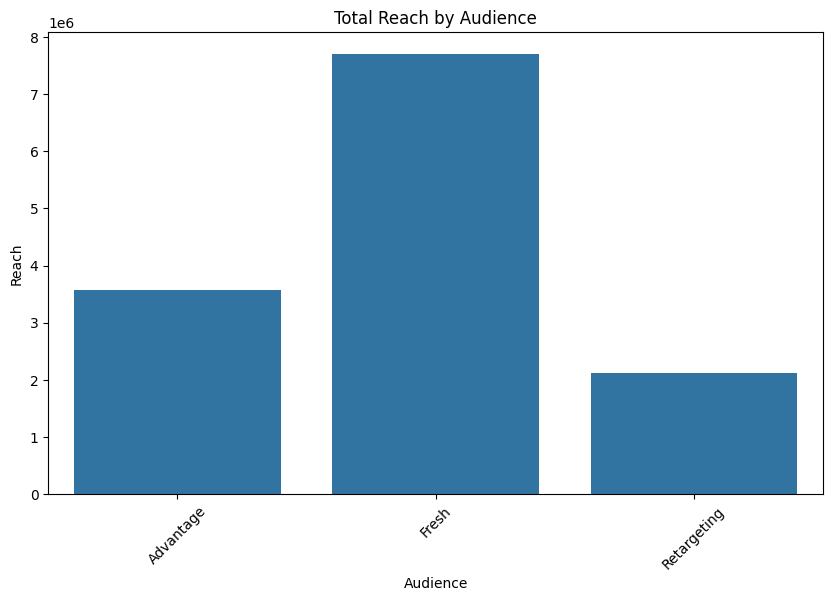

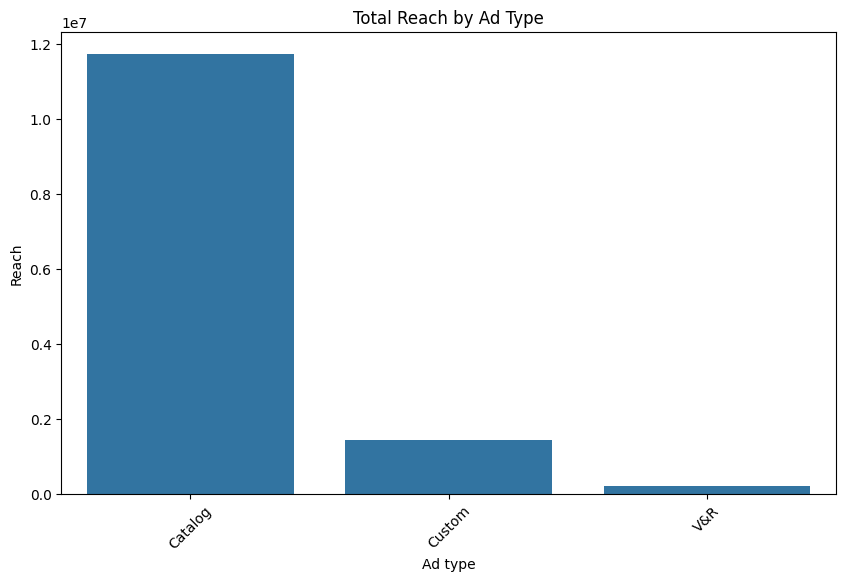

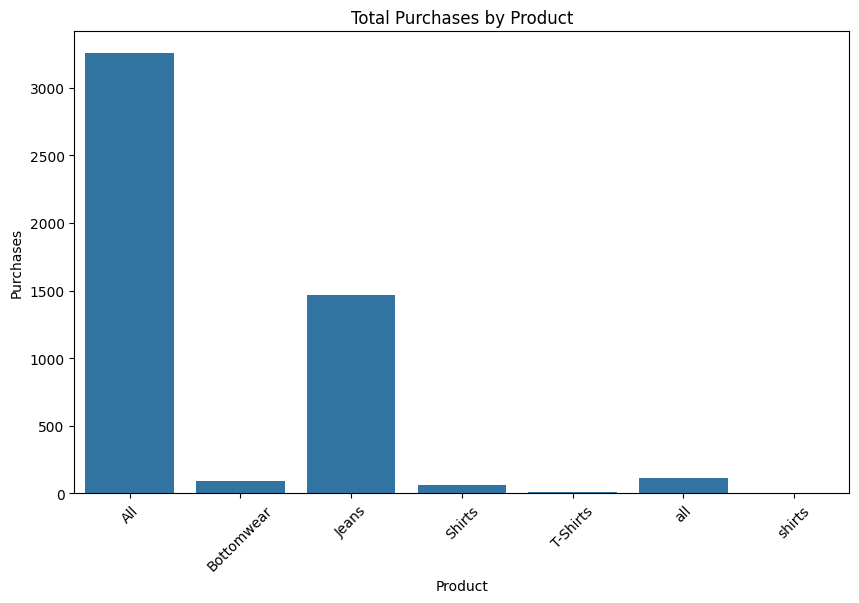

In [58]:
# Convert 'Day' and 'Month' columns to datetime
df['Day'] = pd.to_datetime(df['Day'])
df['Month'] = pd.to_datetime(df['Month'])

# Filter data for a specific week (for example, the first week of January 2024)
start_date = '2024-01-01'
end_date = '2024-01-07'
weekly_data = df[(df['Day'] >= start_date) & (df['Day'] <= end_date)]

# Aggregated Metrics for the Week
weekly_summary = weekly_data.agg({
    'Reach': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Purchases': 'sum',
    'Amount spent (INR)': 'sum',
    'ROAS': 'mean'
}).reset_index()

print("Weekly Summary:")
print(weekly_summary)

# Campaign Performance
campaign_performance = weekly_data.groupby('Campaign name').agg({
    'Reach': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Purchases': 'sum',
    'Amount spent (INR)': 'sum',
    'ROAS': 'mean'
}).reset_index()

# Audience Performance
audience_performance = weekly_data.groupby('Audience').agg({
    'Reach': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Purchases': 'sum',
    'Amount spent (INR)': 'sum',
    'ROAS': 'mean'
}).reset_index()

# Ad Type Performance
ad_type_performance = weekly_data.groupby('Ad type').agg({
    'Reach': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Purchases': 'sum',
    'Amount spent (INR)': 'sum',
    'ROAS': 'mean'
}).reset_index()

# Product Performance
product_performance = weekly_data.groupby('Product').agg({
    'Reach': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Purchases': 'sum',
    'Amount spent (INR)': 'sum',
    'ROAS': 'mean'
}).reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign name', y='Reach', data=campaign_performance)
plt.title('Total Reach by Campaign')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign name', y='Impressions', data=campaign_performance)
plt.title('Total Impressions by Campaign')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign name', y='Clicks', data=campaign_performance)
plt.title('Total Clicks by Campaign')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign name', y='Amount spent (INR)', data=campaign_performance)
plt.title('Total Amount Spent by Campaign')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign name', y='Purchases', data=campaign_performance)
plt.title('Total Purchases by Campaign')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Audience', y='Reach', data=audience_performance)
plt.title('Total Reach by Audience')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Ad type', y='Reach', data=ad_type_performance)
plt.title('Total Reach by Ad Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Purchases', data=product_performance)
plt.title('Total Purchases by Product')
plt.xticks(rotation=45)
plt.show()


Benchmark Metrics:
{'Reach': 41792.012949157615, 'Impressions': 50236.68409639734, 'Clicks': 887.6586557082027, 'Purchases': 10.143401830528706, 'Amount spent (INR)': 2119.7731708023125, 'ROAS': 18.353298001010007}
Daily Performance with Deviations:
          Day    Reach  Impressions  Clicks  Purchases  Amount spent (INR)  \
0  2024-01-01  2411103      2930658   40653        455           126380.91   
1  2024-01-02  1928741      2322264   40133        548           117137.12   
2  2024-01-03  1714353      2076127   43205        659            99075.01   
3  2024-01-04  1886401      2350609   48503        808           107926.46   
4  2024-01-05  1880317      2321845   46589        802           108477.44   
..        ...      ...          ...     ...        ...                 ...   
86 2024-03-27  2427119      3048074   54347        510           130060.10   
87 2024-03-28  2441858      3049370   53895        621           129148.29   
88 2024-03-29  2663679      3293638   54095     

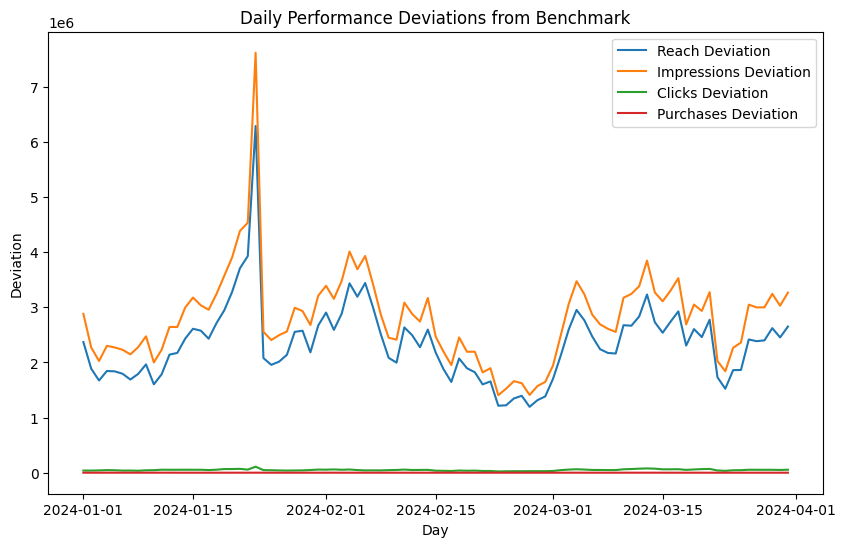

Correlation Matrix:
                    Amount spent (INR)  Impressions    Clicks  Conversions  \
Amount spent (INR)            1.000000     0.960083  0.963038     0.970062   
Impressions                   0.960083     1.000000  0.950112     0.935404   
Clicks                        0.963038     0.950112  1.000000     0.976491   
Conversions                   0.970062     0.935404  0.976491     1.000000   
ROAS                         -0.006131    -0.005739 -0.005711    -0.005498   

                        ROAS  
Amount spent (INR) -0.006131  
Impressions        -0.005739  
Clicks             -0.005711  
Conversions        -0.005498  
ROAS                1.000000  


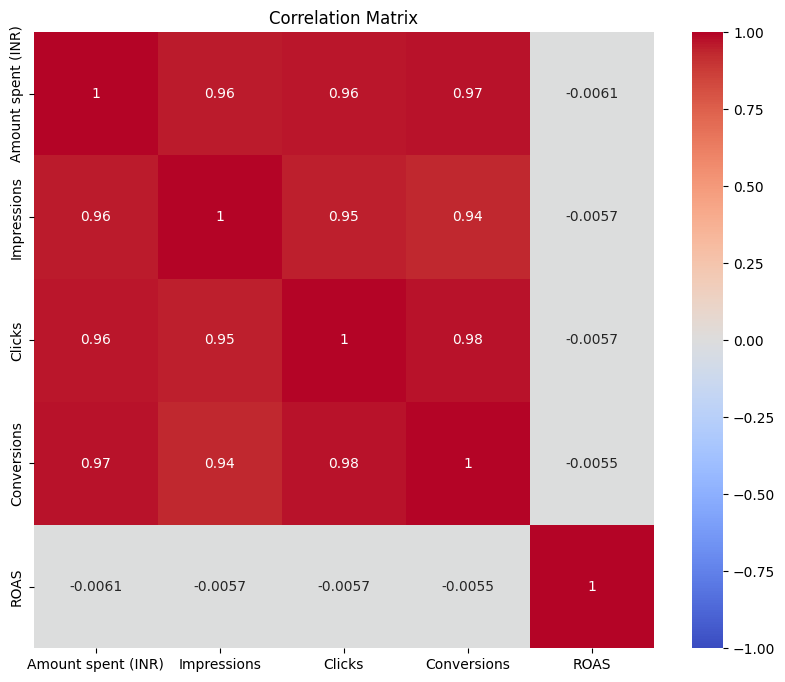

Underperforming Days:
          Day    Reach  Impressions  Clicks  Purchases  Amount spent (INR)  \
0  2024-01-01  2411103      2930658   40653        455           126380.91   
1  2024-01-02  1928741      2322264   40133        548           117137.12   
2  2024-01-03  1714353      2076127   43205        659            99075.01   
3  2024-01-04  1886401      2350609   48503        808           107926.46   
4  2024-01-05  1880317      2321845   46589        802           108477.44   
..        ...      ...          ...     ...        ...                 ...   
85 2024-03-26  2458232      3097662   55101        552           128002.23   
86 2024-03-27  2427119      3048074   54347        510           130060.10   
87 2024-03-28  2441858      3049370   53895        621           129148.29   
88 2024-03-29  2663679      3293638   54095        531           138070.87   
89 2024-03-30  2495296      3078882   51249        556           129661.86   

         ROAS  Reach_deviation  Impressio

In [59]:

# Benchmarking Analysis
# Establish benchmark metrics
benchmark_metrics = df.groupby('Day').agg({
    'Reach': 'mean',
    'Impressions': 'mean',
    'Clicks': 'mean',
    'Purchases': 'mean',
    'Amount spent (INR)': 'mean',
    'ROAS': 'mean'
}).mean().to_dict()

print("Benchmark Metrics:")
print(benchmark_metrics)

# Daily performance comparison
daily_performance = df.groupby('Day').agg({
    'Reach': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Purchases': 'sum',
    'Amount spent (INR)': 'sum',
    'ROAS': 'mean'
}).reset_index()

# Identify deviations from benchmark
daily_performance['Reach_deviation'] = daily_performance['Reach'] - benchmark_metrics['Reach']
daily_performance['Impressions_deviation'] = daily_performance['Impressions'] - benchmark_metrics['Impressions']
daily_performance['Clicks_deviation'] = daily_performance['Clicks'] - benchmark_metrics['Clicks']
daily_performance['Purchases_deviation'] = daily_performance['Purchases'] - benchmark_metrics['Purchases']
daily_performance['Amount_spent_deviation'] = daily_performance['Amount spent (INR)'] - benchmark_metrics['Amount spent (INR)']
daily_performance['ROAS_deviation'] = daily_performance['ROAS'] - benchmark_metrics['ROAS']

print("Daily Performance with Deviations:")
print(daily_performance)

# Visualize deviations
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Reach_deviation', data=daily_performance, label='Reach Deviation')
sns.lineplot(x='Day', y='Impressions_deviation', data=daily_performance, label='Impressions Deviation')
sns.lineplot(x='Day', y='Clicks_deviation', data=daily_performance, label='Clicks Deviation')
sns.lineplot(x='Day', y='Purchases_deviation', data=daily_performance, label='Purchases Deviation')
plt.title('Daily Performance Deviations from Benchmark')
plt.xlabel('Day')
plt.ylabel('Deviation')
plt.legend()
plt.show()

# Correlation Analysis
correlation_matrix = df[['Amount spent (INR)', 'Impressions', 'Clicks', 'Conversions', 'ROAS']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Scenario Mapping
# Identify days where performance is below benchmark
underperforming_days = daily_performance[daily_performance['ROAS'] < benchmark_metrics['ROAS']]

print("Underperforming Days:")
print(underperforming_days)

# Recommendations
for _, row in underperforming_days.iterrows():
    day = row['Day']
    recommendations = []
    
    if row['Clicks_deviation'] < 0:
        recommendations.append("Improve ad creatives and targeting to increase engagement.")
    if row['Purchases_deviation'] < 0:
        recommendations.append("Optimize landing pages and checkout process to boost conversions.")
    if row['ROAS_deviation'] < 0:
        recommendations.append("Re-evaluate budget allocation and bidding strategies to enhance ROAS.")
    
    print(f"Day: {day}")
    print("Recommendations:")
    for recommendation in recommendations:
        print(f"- {recommendation}")
    print("\n")